In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("C:/Users/HAZAL/OneDrive/Masaüstü/Projeler/instagram_reach_analyze/Instagram data.csv", encoding="latin1")
data.head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [102]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [103]:
data = data.dropna()

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Instagram Erişimini Analiz Etme

Şimdi Instagram gönderilerinin erişimini analiz etmeye başlayacağız. Öncelikle anasayfadan aldığımız izlenimlerin dağılımına bir göz atacağız:

C:\Users\HAZAL\AppData\Local\Temp\ipykernel_16944\163694520.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




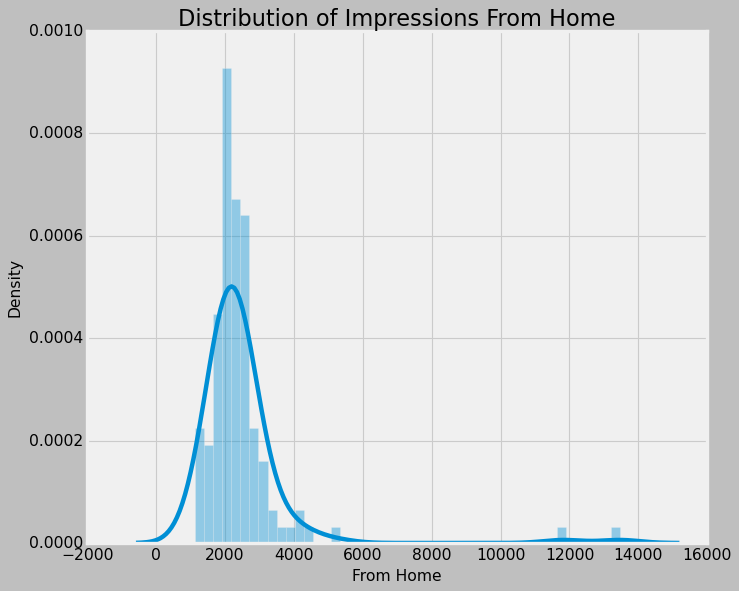

In [105]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions From Home')
sns.distplot(data['From Home'])
plt.show()

Instagram'da ana sayfa kısmından aldığım izlenimler, paylaşımların takipçilere ne kadar ulaştığını gösteriyor. Anasayfadan gelen izlenimlere baktığımda günlük olarak tüm takipçilere ulaşmanın zor olduğunu söyleyebilirim. Şimdi hashtaglerden aldığım izlenimlerin dağılımına bir göz atalım:

C:\Users\HAZAL\AppData\Local\Temp\ipykernel_16944\671336047.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




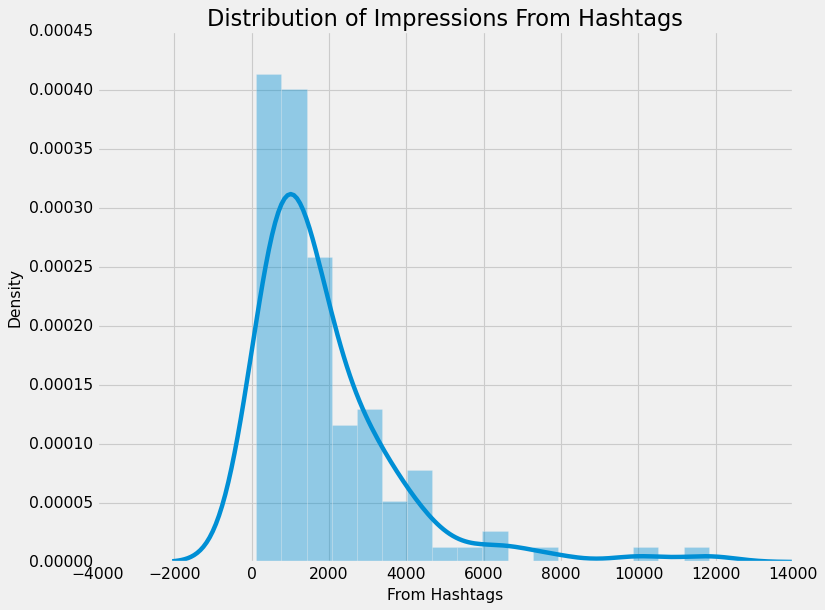

In [106]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Hashtag'ler, oluşturduğumuz içeriğin türüne göre daha fazla kişiye ulaşabilmek amacıyla Instagram'daki gönderilerimizi kategorilere ayırmak için kullandığımız araçlardır. Hashtag gösterimlerine bakıldığında, hashtag kullanılarak tüm gönderilere ulaşılamadığı ancak hashtaglerden birçok yeni kullanıcıya ulaşılabildiği görülüyor. Şimdi Instagram'ın keşfet bölümünden aldığım izlenimlerin dağılımına bir göz atalım:

C:\Users\HAZAL\AppData\Local\Temp\ipykernel_16944\2610232579.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




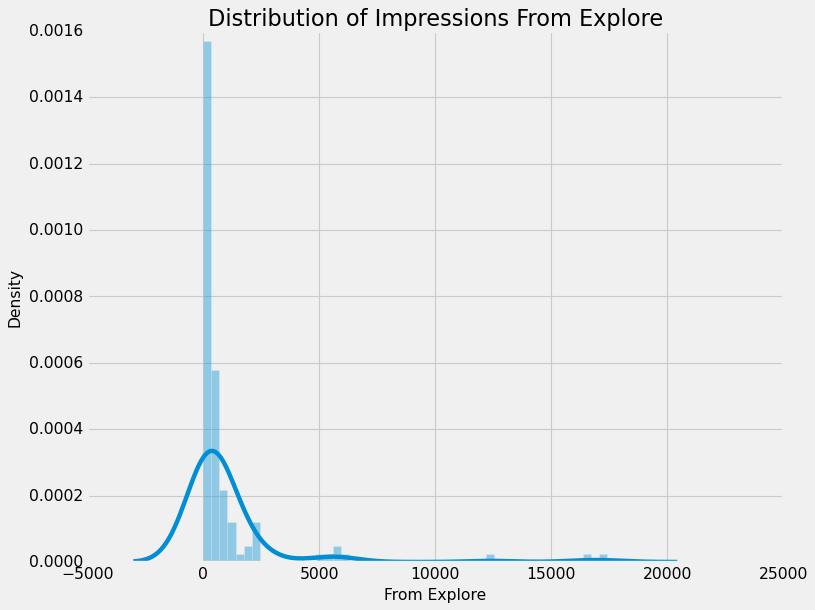

In [107]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

Instagram'ın keşfet bölümü Instagram'ın öneri sistemidir. Kullanıcılara tercihlerine ve ilgi alanlarına göre gönderiler önerir. Keşfet kısmından aldığım izlenimlere bakarak Instagram'ın paylaşımlarımızı kullanıcılara pek tavsiye etmediğini söyleyebilirim. Bazı gönderiler keşfet bölümünden iyi bir erişim aldı ancak hashtag'lerden aldığım erişimle karşılaştırıldığında hala çok düşük.
Şimdi Instagram’da çeşitli kaynaklardan aldığım gösterimlerin yüzdesine bir göz atalım:

In [108]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ["From Home", "From Hashtags", "From Explore", "From Other"]
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, title="Impressions on Instagram Posts From Various Sources", hole=0.5)

fig.show()

Yukarıdaki pie chart, erişimin neredeyse yüzde 50'sinin takipçilerden, yüzde 38,1'inin hashtag'lerden, yüzde 9,14'ünün keşfetten ve yüzde 3,01'inin diğer kaynaklardan geldiğini gösteriyor.

## Analyzing Content
Şimdi Instagram paylaşımlarının içeriğini analiz edelim. Veri kümesinde, Instagram'da yayınlanan içerik türünü anlamamıza yardımcı olacak başlık ve hashtag'ler olmak üzere iki sütun bulunmaktadır.

Instagram gönderilerinin başlıklarında en çok kullanılan kelimelere bakmak için başlık sütununun bir kelime bulutunu oluşturalım:

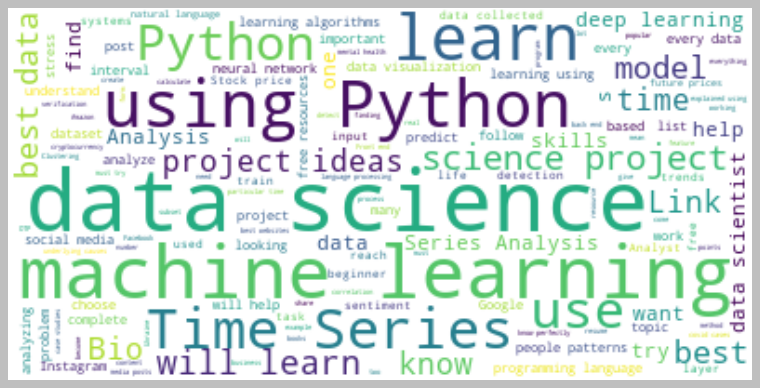

In [109]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Şimdi Instagram gönderilerimde en çok kullanılan hashtag'lere bakmak için hashtag sütunundan bir kelime bulutu oluşturalım:

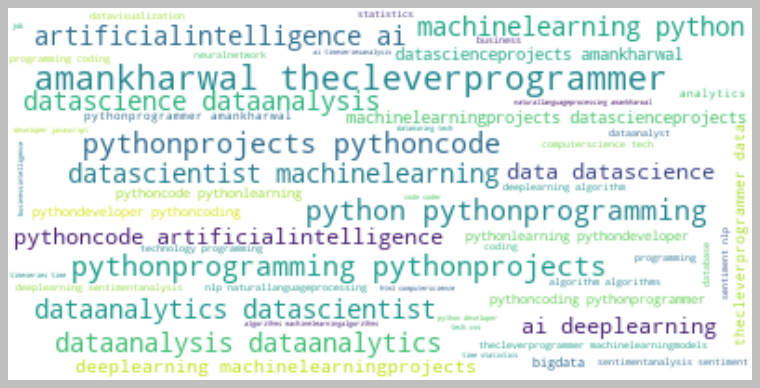

In [110]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analyzing Relationships

Şimdi Instagram erişimimizin en önemli faktörlerini bulmak için ilişkileri analiz edelim. Ayrıca Instagram algoritmasının nasıl çalıştığını anlamamıza da yardımcı olacaktır.

Instagram gönderilerimin beğeni sayısı ile izlenme sayısı arasındaki ilişkiye bir göz atalım:

In [111]:
figure = px.scatter(data_frame = data, x = "Impressions", y="Likes", size="Likes", trendline="ols", 
                    title="Relationship between likes and impressions")

figure.show()

Instagram'da beğeni sayısı ile ulaştığım erişim arasında doğrusal bir ilişki var. Şimdi Instagram paylaşımlarıma yapılan yorum sayısı ile gösterim sayısı arasındaki ilişkiye bakalım:

In [112]:
figure = px.scatter(data_frame = data, x="Impressions", y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship between comments and total impressions")

figure.show()

Görünüşe göre bir gönderiye aldığımız yorum sayısı, gönderinin erişimini etkilemiyor. Şimdi paylaşım sayısı ile gösterim sayısı arasındaki ilişkiye bakalım:

In [113]:
figure = px.scatter(data_frame=data, x="Impressions", y="Shares", size="Shares", trendline="ols",
                    title="Relationship between shares and total impressions")

figure.show()

Daha fazla sayıda paylaşım daha yüksek erişime yol açacaktır ancak paylaşımlar bir gönderinin erişimini beğeniler kadar etkilemez. Şimdi kaydetme sayısı ile gösterim sayısı arasındaki ilişkiye bir göz atalım:

In [114]:
figure = px.scatter(data_frame = data, x="Impressions", y="Saves", size="Saves", trendline="ols",
                    title="Relationship Between Post Saves and Total Impressions")

figure.show()

Gönderimin kaydedilme sayısı ile Instagram gönderimin erişimi arasında doğrusal bir ilişki var. Şimdi tüm sütunların Postlar sütunuyla ilişkisine bir göz atalım:

In [115]:
correlation = data.corr()
correlation["Impressions"].sort_values(ascending=False)

C:\Users\HAZAL\AppData\Local\Temp\ipykernel_16944\798687512.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

Yani daha fazla beğeni ve kaydetmenin Instagram'da daha fazla erişim elde etmenize yardımcı olacağını söyleyebiliriz. Paylaşım sayısının yüksek olması aynı zamanda daha fazla erişim elde etmenize de yardımcı olacaktır ancak paylaşım sayısının düşük olması da erişiminizi etkilemeyecektir.

## Analyzing Conversion Rate

Instagram'da sohbet oranı, bir gönderinin profil ziyareti sayısından kaç takipçi kazandığınız anlamına gelir. Dönüşüm oranını hesaplamak için kullanabileceğiniz formül (Takip/Profil Ziyaretleri) * 100. Şimdi Instagram hesabımın sohbet oranına bir göz atalım:

In [116]:
conversation_rate = (data["Follows"].sum()/ data["Profile Visits"].sum()) * 100
conversation_rate

41.00265604249668

Yani Instagram hesabının sohbet oranı %41, bu da çok iyi bir sohbet oranına benziyor. Toplam profil ziyaretleri ile tüm profil ziyaretlerinden elde edilen takipçi sayısı arasındaki ilişkiye bir göz atalım:

In [117]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

Profil ziyaretleri ile kazanılan takipçiler arasındaki ilişki de doğrusaldır.

## Instagram Reach Prediction Model

Şimdi bu bölümde bir Instagram gönderisinin erişimini tahmin etmek için bir makine öğrenimi modeli eğiteceğim. Modeli eğitmeden önce verileri eğitim ve test setlerine bölelim:

In [118]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Şimdi Python kullanarak bir Instagram gönderisinin erişimini tahmin etmek için bir makine öğrenimi modelini nasıl eğitebileceğimizi burada bulabilirsiniz:

In [119]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.88459298145649

Şimdi makine öğrenimi modeline girdiler vererek bir Instagram gönderisinin erişimini tahmin edelim:

In [120]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10867.31675704])